In [31]:
# Based on https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
import numpy as np
import pandas as pd
import seaborn as sns
import keras  # uses TensorFlow backend
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import model_from_json
from tensorflow.keras import optimizers
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as p

In [32]:
#read CSV file as a dataset with pandas
mofs_dataset=pd.read_csv("MOFS_data.csv")

In [33]:
mofs_dataset.describe()

,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total
count,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000
mean,1.695517,1878.529287,19.147877,2.087369,-758.155602
std,0.646335,2365.395924,36.811554,1.131588,468.324309
min,0.087070,170.866767,1.000000,0.000131,-3449.382161
25%,1.335527,791.222381,2.000000,1.088290,-908.198745
50%,1.698561,1140.413002,9.000000,2.143179,-634.511489
75%,2.063292,2063.547768,15.000000,2.887478,-451.999601
max,5.436020,49206.400520,230.000000,6.445777,-110.014150


In [34]:
mofs_dataset.head()

,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total
0,2.763246,408.857471,2,0.632527,-238.661417
1,3.229952,1781.965032,14,1.134232,-672.046744
2,1.557644,1292.643180,9,0.345448,-759.996078
3,1.616139,1245.856916,14,0.342645,-760.103362
4,1.596537,1148.155557,2,1.973007,-700.817715


In [35]:
mofs_dataset.shape

(20375, 5)

In [36]:
mofs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20375 entries, 0 to 20374
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   info.density                     20375 non-null  float64
 1   info.volume                      20375 non-null  float64
 2   info.symmetry.spacegroup_number  20375 non-null  int64  
 3   outputs.pbe.bandgap              20375 non-null  float64
 4   outputs.pbe.energy_total         20375 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 796.0 KB


In [37]:
mofs_dataset.corr()

,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total
info.density,1.000000,-0.542891,-0.087174,0.195002,0.376221
info.volume,-0.542891,1.000000,0.170474,-0.068592,-0.579868
info.symmetry.spacegroup_number,-0.087174,0.170474,1.000000,0.027629,-0.238171
outputs.pbe.bandgap,0.195002,-0.068592,0.027629,1.000000,0.075009
outputs.pbe.energy_total,0.376221,-0.579868,-0.238171,0.075009,1.000000


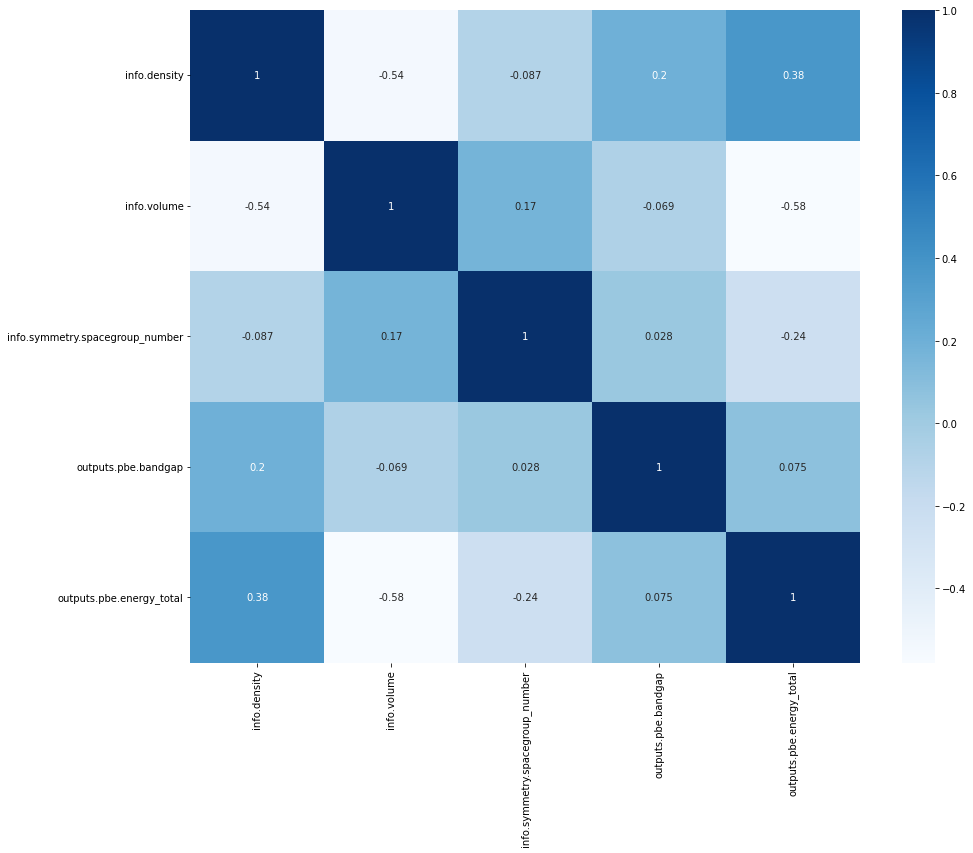

In [38]:
p.figure(figsize = (15, 12))
sns.heatmap(mofs_dataset.corr(), annot = True, cmap = "Blues")
p.show()

<AxesSubplot:>

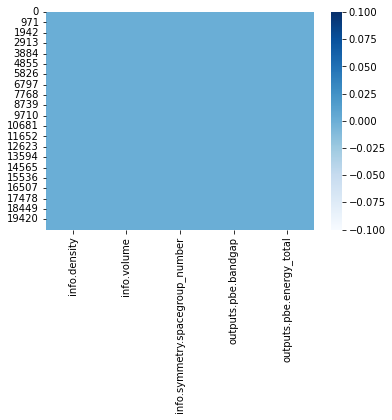

In [39]:
# Check for null values
sns.heatmap(mofs_dataset.isnull(), cmap = "Blues")

In [40]:
mofs_dataset.isnull().sum()

info.density                       0
info.volume                        0
info.symmetry.spacegroup_number    0
outputs.pbe.bandgap                0
outputs.pbe.energy_total           0
dtype: int64

# No null value found

array([[<AxesSubplot:title={'center':'info.density'}>,
        <AxesSubplot:title={'center':'info.volume'}>],
       [<AxesSubplot:title={'center':'info.symmetry.spacegroup_number'}>,
        <AxesSubplot:title={'center':'outputs.pbe.bandgap'}>],
       [<AxesSubplot:title={'center':'outputs.pbe.energy_total'}>,
        <AxesSubplot:>]], dtype=object)

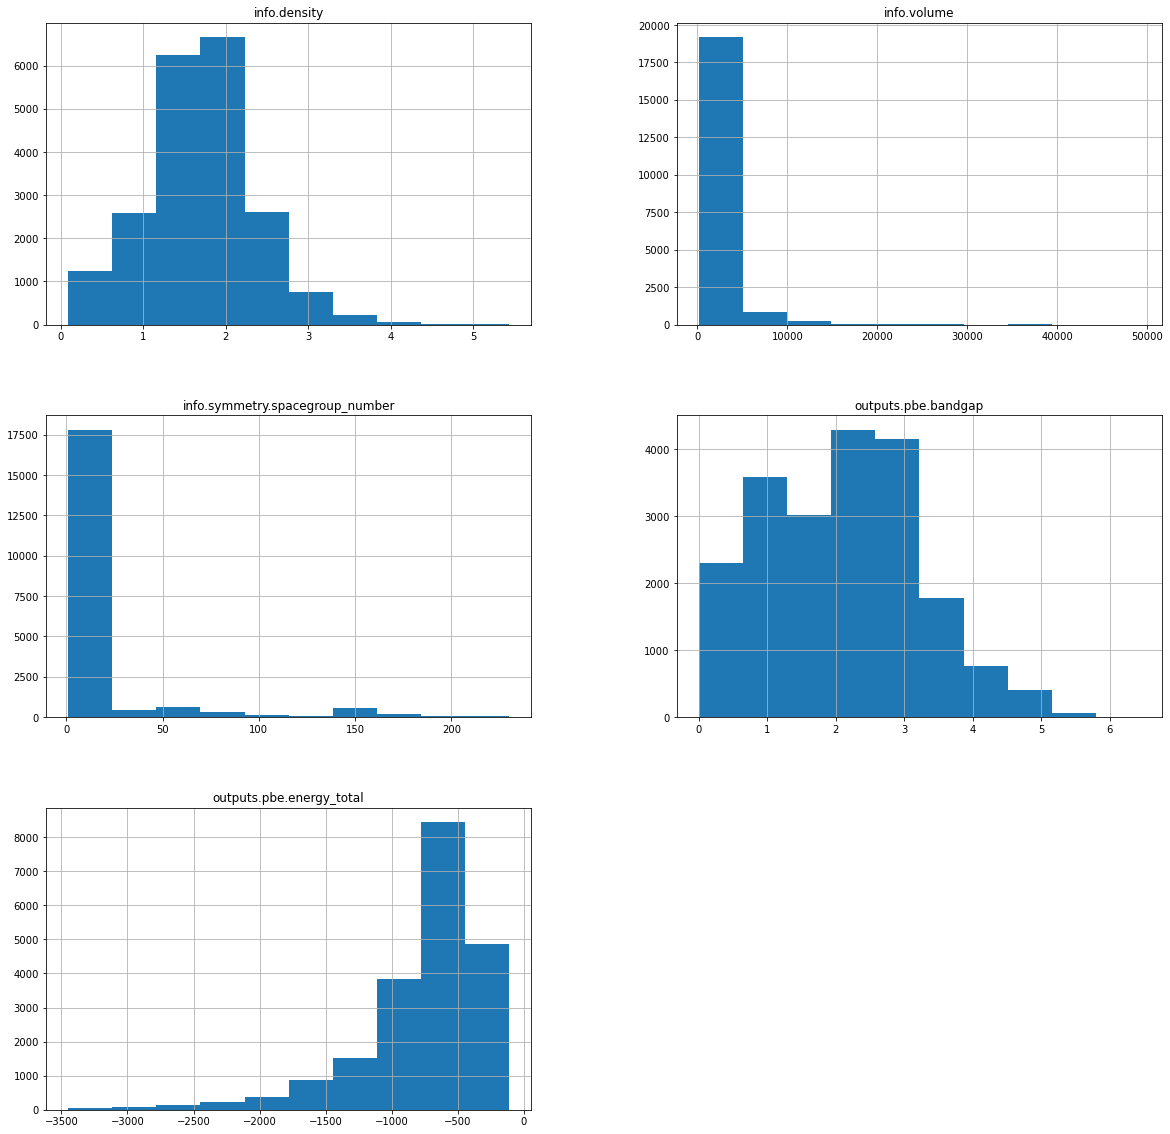

In [41]:
# Display all columns in histogram format
mofs_dataset.hist(figsize = (20,20))

In [42]:
# Checking duplicates
duplicates = mofs_dataset[mofs_dataset.duplicated()]
print("Duplicates: ", len(duplicates))
duplicates

Duplicates:  0


,info.density,info.volume,info.symmetry.spacegroup_number,outputs.pbe.bandgap,outputs.pbe.energy_total


In [43]:
mofs_dataset.shape

(20375, 5)

# Train-test split

In [44]:
# input
x = mofs_dataset.iloc[:, 1:].values
# output
y = mofs_dataset.iloc[:, 0].values

# Split data into 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [45]:
print(x)

[[ 4.08857471e+02  2.00000000e+00  6.32527000e-01 -2.38661417e+02]
 [ 1.78196503e+03  1.40000000e+01  1.13423200e+00 -6.72046744e+02]
 [ 1.29264318e+03  9.00000000e+00  3.45448000e-01 -7.59996078e+02]
 ...
 [ 8.08834646e+03  1.00000000e+00  3.38362900e+00 -9.13083401e+02]
 [ 3.14310356e+04  1.00000000e+00  6.60589000e-01 -1.51260732e+03]
 [ 3.47940261e+04  1.00000000e+00  2.34802100e+00 -1.57249324e+03]]


In [46]:
print(y)

[2.76324637 3.22995179 1.55764365 ... 0.38096338 0.13294879 0.1258275 ]


# Feature Scaling using MinMaxScalar

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [48]:
print(x_train)

[[0.05253759 0.00436681 0.16721737 0.70905918]
 [0.03117488 0.         0.36669885 0.87924696]
 [0.00939682 0.08296943 0.37466563 0.91432942]
 ...
 [0.01876776 0.00436681 0.0513767  0.83256212]
 [0.01751383 0.05676856 0.12993019 0.8564365 ]
 [0.01283635 0.05676856 0.19714409 0.883274  ]]


In [49]:
print(x_test )

[[0.10452727 0.05676856 0.06172585 0.0817294 ]
 [0.01985489 0.12227074 0.6532377  0.84170966]
 [0.00365334 0.04803493 0.10473706 0.97701696]
 ...
 [0.01081633 0.00436681 0.49536943 0.90844941]
 [0.01514315 0.         0.33144901 0.93580253]
 [0.02348259 0.06113537 0.48604065 0.78823178]]


# tabular to image data

In [ ]:
#DeepInsight Image Transformation